<a href="https://colab.research.google.com/github/darien-schettler/king-county-house-price-eda-and-model/blob/master/KC-house-price-eda-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County House Prices
### https://www.kaggle.com/harlfoxem/housesalesprediction

**id** 
- a notation for a house  

**date**
- Date house was sold  

**price**
- Price is prediction target  

**bedrooms**
- Number of Bedrooms/House  

**bathrooms**
- Number of bathrooms/bedrooms  

**sqft_living**
- square footage of the home  

**sqft_lot**
- square footage of the lot  

**floors**
- Total floors (levels) in house  

**waterfront**
- House which has a view to a waterfront  

**view**
- Has been viewed  

**condition**
- How good the condition is ( Overall )  

**gradeoverall**
- grade given to the housing unit, based on King County grading system  

**sqft_above**
- square footage of house apart from basement  

**sqft_basement**
- square footage of the basement  

**yr_built**
- Built Year  

**yr_renovated**
- Year when house was renovated  

**zipcode**
- zip  

**lat**
- Latitude coordinate  

**long**
- Longitude coordinate  

**sqft_living15**
- Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area  

**sqft_lot15**
- lotSize area in 2015(implies-- some renovations)  

# 1.1 -- Import Libraries
-------------------
**Pandas** - Excel-like library for handling data in an orderly fashion (rows/columns/indices/etc.)  

**Numpy** - Calculator tool  

**Matplotlib** - Graphing tool  

**Seaborn** - Graphing tool

In [0]:
import pandas as pd
import numpy as np
import random
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=0.8)
%matplotlib inline

# 1.2 -- Import The Data Features (X) And Data Labels (Y)
-------------------  

In [0]:
# Open the csv file and store it as a pd.DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/darien-schettler/king-county-house-price-eda-and-model/master/kc_house_data.csv") 

for i, feature in enumerate(df.columns):
    print("Feature {} is {}".format(i+1, feature))

Feature 1 is id
Feature 2 is date
Feature 3 is price
Feature 4 is bedrooms
Feature 5 is bathrooms
Feature 6 is sqft_living
Feature 7 is sqft_lot
Feature 8 is floors
Feature 9 is waterfront
Feature 10 is view
Feature 11 is condition
Feature 12 is grade
Feature 13 is sqft_above
Feature 14 is sqft_basement
Feature 15 is yr_built
Feature 16 is yr_renovated
Feature 17 is zipcode
Feature 18 is lat
Feature 19 is long
Feature 20 is sqft_living15
Feature 21 is sqft_lot15


# 1.3 -- Do Some Basic Data Exploration On The Features

In [0]:
print("There are {} houses in the dataset and each house as {} features\n".format(df.shape[0], df.shape[1]))

# print(df.info())  -- no missing data

print("These are the various datatypes and how often they occur within the dataset")
print(df.dtypes.value_counts())

print()

print(df.describe())

There are 21613 houses in the dataset and each house as 21 features

These are the various datatypes and how often they occur within the dataset
int64      15
float64     5
object      1
dtype: int64

                 id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.400881e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.671272e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]


In [0]:
# Find matrix of correlations
correlation = df.corr()["price"]

# Sort the correlation list keeping the indices and then flip the list (::-1) (because it sorts min to max normally)
print(correlation[np.argsort(correlation, axis=0)[::-1]])
# As somewhere to start let's discard everything that has less than 0.15 correlation

# This means we would discard :
# ---------------------------
#  yr_renovated     0.126434
#  sqft_lot         0.089661
#  sqft_lot15       0.082447
#  yr_built         0.054012
#  condition        0.036362
#  long             0.021626
#  id              -0.016762
#  zipcode         -0.053203

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [0]:
# Make new df without the features we decided we don't want to deal with
to_drop = ['sqft_lot', 'sqft_lot15', 'yr_built', 'condition', 'long', 'id', 'zipcode', 'yr_renovated']
df_v1 = df.drop(to_drop, axis=1)
print(df_v1.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'sqft_living15'],
      dtype='object')


### Having observed which features correlated strongly with price, let's next see which features are multi-colinear

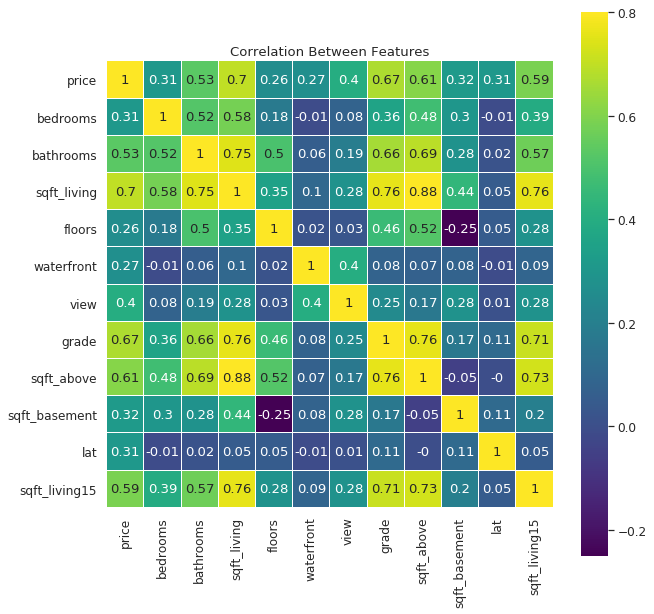

In [0]:
corrMatrix=np.round(df_v1[df_v1.columns].corr(),2)

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, 
            vmax=0.8, 
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='viridis',
            linecolor="white")

plt.title('Correlation Between Features')
plt.show()

In [0]:
## Check correlation between sqft_above and sqft_living
#df_v1['sqft_above'].corr(df_v1['sqft_living'])

0.876596598681318

### Multi-Colinearity Is Often A Problem and It Usually Indicates That Features Can Be Combined (Or PCA)
For now we will let it alone and come back to it after

### To continue exploring we will look at the distribution of sale prices for the houses

Text(0.5, 0, 'Sale Price')

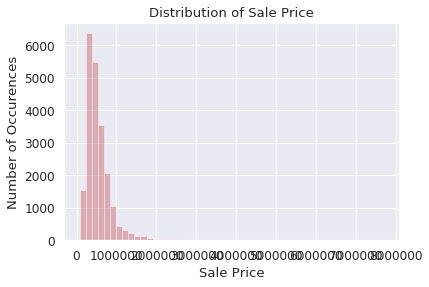

In [0]:
sns.distplot(df_v1.price, bins=50, color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

In [0]:
#skewness  
#kurtosis

print("\nThe skew value is : {}\nThe kurtosis value is : {}\n".format(df_v1.price.skew(), df_v1.price.kurt()))


The skew value is : 4.024069144684712
The kurtosis value is : 34.58554043194243



### We can see that the data is heavily skewed (Kurtosis) to the left (Under 1 Million Dollars)
**I personally Would Like to See The Distribution UNDER 1000000 dollars**

In [0]:
price_under_1_million = [x for x in df_v1.price if x < 1000000]


Text(0.5, 0, 'Sale Price')

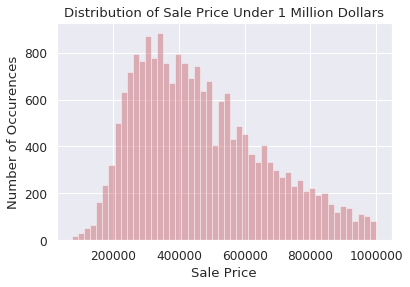

In [0]:
sns.distplot(price_under_1_million, bins=50, color="r", kde=False)
plt.title("Distribution of Sale Price Under 1 Million Dollars")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

### We can now see that there is a peak around 300,000 but the data is pretty noisy  
**Additionally it appears the data is exponential in increasing frequency when approaching 300,000 but decays at a relatively linear rate**

It's all well and good to just visualize without the upper limit... but to get a better idea of what's going on let's see how the top 0.5% live

In [0]:
theRichBoundary = np.percentile(df_v1.price.values, 99.5)
print("There are {} examples of houses that sold higher than the richy-rich boundary of ${}".format(df_v1.price[df_v1.price.values>theRichBoundary].count(), int(round(theRichBoundary))))

There are 109 examples of houses that sold higher than the richy-rich boundary of $2453290


Text(0.5, 0, 'Sale Price')

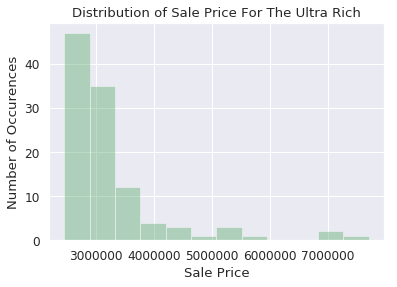

In [0]:
rich_people = [x for x in df_v1.price if x >= theRichBoundary]

sns.distplot(rich_people, bins=12, color="g", kde=False)
plt.title("Distribution of Sale Price For The Ultra Rich")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

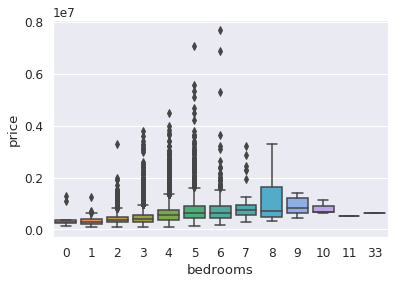

In [0]:
sns.boxplot("bedrooms","price",data=df)

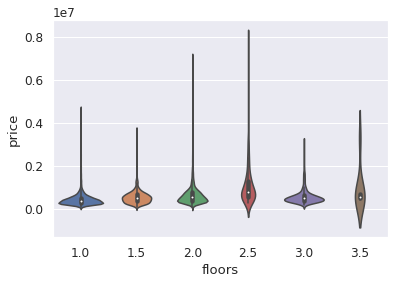

In [0]:
sns.violinplot("floors", "price", data=df)

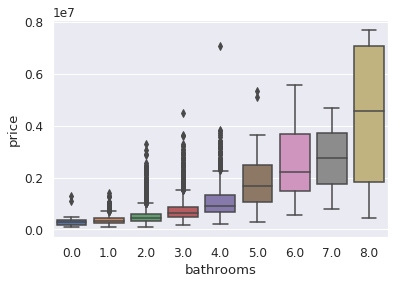

In [0]:
sns.boxplot(np.round(df.bathrooms), df.price)

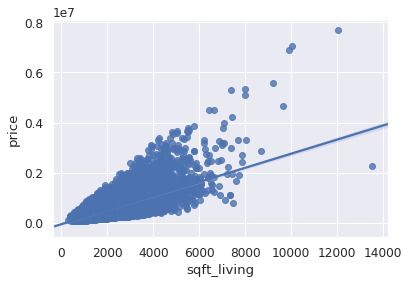

In [0]:
sns.regplot(df.sqft_living, df.price)

That's probably enough data exploration for now... I'll restructure this to make it prettier later and jump right into modeling so I have something done...

## Let's Create Dummy Variable/Columns, And Min-Max Normalize Our Data

### We need to create dummy variables when the numbers in the columns don't properly represent the data
**DATE** -- We can split into 2014 and 2015  

**PRICE** -- Normalize by dividing 50000  

**BEDROOMS** -- Categorize  

**BATHROOMS** -- Categorize  

**SQFT_LIVING** -- Min/Max Normalization  

**FLOORS** -- Categorize  

**WATERFRONT** -- Leave Alone (Already Binary)  

**VIEW** -- Leave Alone (Already Binary)  

**SQFT_ABOVE** -- Min/Max Normalization  

**SQFT_BASEMENT** -- Min/Max Normalization  

**LATITUDE** -- Categorize (Or Try)



In [0]:
df_v2 = df_v1.copy()

## Let's Fix The Date Column First

In [0]:
# New array for dates to temporarily hold things
new_date_column = []

# Iterate through all the dates and extract only the year and save it to the new_date_column array
for date in df_v1.date:
    new_date_column.append(date[0:4])
    
# Print 5 dates so we can see
print(new_date_column[0:5])

['2014', '2014', '2015', '2014', '2015']


In [0]:
# Since we need to one hot encode these dates (two columns, one for 2014 and one for 2015) we use LabelEncoder
# Label encoder must be declared before it is used hence two lines instead of one
label_encoder = LabelEncoder()
integer_encoded_dates = label_encoder.fit_transform(new_date_column)

# As we can see 2014 is represented as 0 and 2015 is represented as 1 here
print(integer_encoded_dates[0:5])

[0 0 1 0 1]


In [0]:
# Now we use to_categorical (from Keras) to turn our encoded list into two columns
one_hot_encoded_dates = to_categorical(integer_encoded_dates)

# Again we print the first 5 examples and we see that we now have two columns
print(one_hot_encoded_dates[0:5])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [0]:
# Now we need to split the two date columns
date_2014 = one_hot_encoded_dates[:,0]
date_2015 = one_hot_encoded_dates[:,1]

# See the first 5 examples to make sure it worked
print(date_2014[0:5])
print(date_2015[0:5])

[1. 1. 0. 1. 0.]
[0. 0. 1. 0. 1.]


In [0]:
# Now we need to add these two lists to the dataFrame as Series objects (just pandas stuff)
df_v2["Date_2014"] = date_2014
df_v2["Date_2015"] = date_2015
df_v2 = df_v2.drop("date", axis=1)

print(df_v2.head(5))

      price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0  221900.0         3       1.00         1180     1.0           0     0   
1  538000.0         3       2.25         2570     2.0           0     0   
2  180000.0         2       1.00          770     1.0           0     0   
3  604000.0         4       3.00         1960     1.0           0     0   
4  510000.0         3       2.00         1680     1.0           0     0   

   grade  sqft_above  sqft_basement      lat  sqft_living15  Date_2014  \
0      7        1180              0  47.5112           1340        1.0   
1      7        2170            400  47.7210           1690        1.0   
2      6         770              0  47.7379           2720        0.0   
3      7        1050            910  47.5208           1360        1.0   
4      8        1680              0  47.6168           1800        0.0   

   Date_2015  
0        0.0  
1        0.0  
2        1.0  
3        0.0  
4        1.0  


## Let's Fix The Price Column Next

**For simplicity we will simply divide all the prices by 100,000 dollars so that it is easy to scale them back up later

In [0]:
df_v2.price = df_v2.price/100000

# Check the first 5 examples
print(df_v2.price.head(5))

0    2.219
1    5.380
2    1.800
3    6.040
4    5.100
Name: price, dtype: float64


## Let's Fix Bedrooms and Bathrooms Next

**This will follow the same method we used for years so we will go through it faster**

In [0]:
# Lets see how many unique values there are in the bedrooms and bathrooms categories
print("UNIQUE BEDROOMS:\n{}".format(np.unique(df_v2.bedrooms)))
print("\nThere are {} unique bedroom types".format(len(np.unique(df_v2.bedrooms))))
print("\nUNIQUE BATHROOMS:\n{}".format(np.unique(df_v2.bathrooms)))
print("\nThere are {} unique bathroom types".format(len(np.unique(df_v2.bathrooms))))

UNIQUE BEDROOMS:
[ 0  1  2  3  4  5  6  7  8  9 10 11 33]

There are 13 unique bedroom types

UNIQUE BATHROOMS:
[0.   0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5
 7.75 8.  ]

There are 30 unique bathroom types


In [0]:
print("ORIGINAL 5 EXAMPLES OF BEDROOMS:\n{}".format(df_v2.bedrooms.head(5)))
print("\nORIGINAL 5 EXAMPLES OF BATHROOMS:\n{}".format(df_v2.bathrooms.head(5)))

# INTEGER ENCODING
integer_encoded_bedrooms = label_encoder.fit_transform(df_v2.bedrooms)
integer_encoded_bathrooms = label_encoder.fit_transform(df_v2.bathrooms)

# Print Check for Integer Encoding
print("\nINTEGER ENCODED 5 EXAMPLES OF BEDROOMS:\n{}".format(integer_encoded_bedrooms[0:5]))
print("\nINTEGER ENCODED 5 EXAMPLES OF BATHROOMS:\n{}".format(integer_encoded_bathrooms[0:5]))

# ONE_HOT ENCODING
one_hot_encoded_bedrooms = to_categorical(integer_encoded_bedrooms)
one_hot_encoded_bathrooms = to_categorical(integer_encoded_bathrooms)

# Print Check for Integer Encoding
print("\nONE_HOT ENCODED 5 EXAMPLES OF BEDROOMS:\n{}".format(one_hot_encoded_bedrooms[0:5]))
print("\nONE_HOT ENCODED 5 EXAMPLES OF BATHROOMS:\n{}".format(one_hot_encoded_bathrooms[0:5]))

print("\nWe now have {} columns for the {} examples derived from bedrooms".format(np.shape(one_hot_encoded_bedrooms)[1], np.shape(one_hot_encoded_bedrooms)[0]))
print("\nWe now have {} columns for the {} examples derived from bathrooms".format(np.shape(one_hot_encoded_bathrooms)[1], np.shape(one_hot_encoded_bathrooms)[0]))


ORIGINAL 5 EXAMPLES OF BEDROOMS:
0    3
1    3
2    2
3    4
4    3
Name: bedrooms, dtype: int64

ORIGINAL 5 EXAMPLES OF BATHROOMS:
0    1.00
1    2.25
2    1.00
3    3.00
4    2.00
Name: bathrooms, dtype: float64

INTEGER ENCODED 5 EXAMPLES OF BEDROOMS:
[3 3 2 4 3]

INTEGER ENCODED 5 EXAMPLES OF BATHROOMS:
[ 3  8  3 11  7]

ONE_HOT ENCODED 5 EXAMPLES OF BEDROOMS:
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

ONE_HOT ENCODED 5 EXAMPLES OF BATHROOMS:
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]


In [0]:
# Generate New Column Titles
bedroom_columns = []
for unique_bedroom in np.unique(df_v2.bedrooms):
    bedroom_columns.append(str(unique_bedroom)+"_Bedroom")
    
bathroom_columns = []
for unique_bathroom in np.unique(df_v2.bathrooms):
    bathroom_columns.append(str(unique_bathroom)+"_Bathroom")

print(bedroom_columns)
print()
print(bathroom_columns)

['0_Bedroom', '1_Bedroom', '2_Bedroom', '3_Bedroom', '4_Bedroom', '5_Bedroom', '6_Bedroom', '7_Bedroom', '8_Bedroom', '9_Bedroom', '10_Bedroom', '11_Bedroom', '33_Bedroom']

['0.0_Bathroom', '0.5_Bathroom', '0.75_Bathroom', '1.0_Bathroom', '1.25_Bathroom', '1.5_Bathroom', '1.75_Bathroom', '2.0_Bathroom', '2.25_Bathroom', '2.5_Bathroom', '2.75_Bathroom', '3.0_Bathroom', '3.25_Bathroom', '3.5_Bathroom', '3.75_Bathroom', '4.0_Bathroom', '4.25_Bathroom', '4.5_Bathroom', '4.75_Bathroom', '5.0_Bathroom', '5.25_Bathroom', '5.5_Bathroom', '5.75_Bathroom', '6.0_Bathroom', '6.25_Bathroom', '6.5_Bathroom', '6.75_Bathroom', '7.5_Bathroom', '7.75_Bathroom', '8.0_Bathroom']


In [0]:
# We now do what we did before ... generate new columns for all of the bedrooms and bathrooms

for i, column in enumerate(bedroom_columns):
    df_v2[column] = one_hot_encoded_bedrooms[:,i]

for i, column in enumerate(bathroom_columns):
    df_v2[column] = one_hot_encoded_bathrooms[:,i]

print(df_v2.head(5))
print()
print(df_v2.columns)

   price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  grade  \
0  2.219         3       1.00         1180     1.0           0     0      7   
1  5.380         3       2.25         2570     2.0           0     0      7   
2  1.800         2       1.00          770     1.0           0     0      6   
3  6.040         4       3.00         1960     1.0           0     0      7   
4  5.100         3       2.00         1680     1.0           0     0      8   

   sqft_above  sqft_basement      ...       5.25_Bathroom  5.5_Bathroom  \
0        1180              0      ...                 0.0           0.0   
1        2170            400      ...                 0.0           0.0   
2         770              0      ...                 0.0           0.0   
3        1050            910      ...                 0.0           0.0   
4        1680              0      ...                 0.0           0.0   

   5.75_Bathroom  6.0_Bathroom  6.25_Bathroom  6.5_Bathroom  6.75_Bathroom

In [0]:
# Now we get rid of the original bedrooms and bathrooms columns
df_v2 = df_v2.drop("bedrooms", axis=1)
df_v2 = df_v2.drop("bathrooms", axis=1)

print(df_v2.columns)

Index(['price', 'sqft_living', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'Date_2014',
       'Date_2015', '0_Bedroom', '1_Bedroom', '2_Bedroom', '3_Bedroom',
       '4_Bedroom', '5_Bedroom', '6_Bedroom', '7_Bedroom', '8_Bedroom',
       '9_Bedroom', '10_Bedroom', '11_Bedroom', '33_Bedroom', '0.0_Bathroom',
       '0.5_Bathroom', '0.75_Bathroom', '1.0_Bathroom', '1.25_Bathroom',
       '1.5_Bathroom', '1.75_Bathroom', '2.0_Bathroom', '2.25_Bathroom',
       '2.5_Bathroom', '2.75_Bathroom', '3.0_Bathroom', '3.25_Bathroom',
       '3.5_Bathroom', '3.75_Bathroom', '4.0_Bathroom', '4.25_Bathroom',
       '4.5_Bathroom', '4.75_Bathroom', '5.0_Bathroom', '5.25_Bathroom',
       '5.5_Bathroom', '5.75_Bathroom', '6.0_Bathroom', '6.25_Bathroom',
       '6.5_Bathroom', '6.75_Bathroom', '7.5_Bathroom', '7.75_Bathroom',
       '8.0_Bathroom'],
      dtype='object')


## Lets Quickly Categorize Floors To Get It Out Of The Way

In [0]:
print(np.unique(df_v2.floors))
print("There are {} unique floor values".format(len(np.unique(df_v2.floors))))

[1.  1.5 2.  2.5 3.  3.5]
There are 6 unique floor values


In [0]:
print("ORIGINAL 5 EXAMPLES OF FLOORS:\n{}".format(df_v2.floors.head(5)))

# INTEGER ENCODING
integer_encoded_floors = label_encoder.fit_transform(df_v2.floors)

# Print Check for Integer Encoding
print("\nINTEGER ENCODED 5 EXAMPLES OF FLOORS:\n{}".format(integer_encoded_floors[0:5]))

# ONE_HOT ENCODING
one_hot_encoded_floors = to_categorical(integer_encoded_floors)

# Print Check for Integer Encoding
print("\nONE_HOT ENCODED 5 EXAMPLES OF FLOORS:\n{}".format(one_hot_encoded_floors[0:5]))

print("\nWe now have {} columns for the {} examples derived from floors".format(np.shape(one_hot_encoded_floors)[1], np.shape(one_hot_encoded_floors)[0]))


ORIGINAL 5 EXAMPLES OF FLOORS:
0    1.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: floors, dtype: float64

INTEGER ENCODED 5 EXAMPLES OF FLOORS:
[0 2 0 0 0]

ONE_HOT ENCODED 5 EXAMPLES OF FLOORS:
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]

We now have 6 columns for the 21613 examples derived from floors


In [0]:
# Generate New Column Titles
floor_columns = []
for unique_floor in np.unique(df_v2.floors):
    floor_columns.append(str(unique_floor)+"_Floors")
    
print(floor_columns)

['1.0_Floors', '1.5_Floors', '2.0_Floors', '2.5_Floors', '3.0_Floors', '3.5_Floors']


In [0]:
# We now do what we did before ... generate new columns for all of the bedrooms and bathrooms

for i, column in enumerate(floor_columns):
    df_v2[column] = one_hot_encoded_floors[:,i]
    
print(df_v2.head(5))
print()
print(df_v2.columns)

   price  sqft_living  floors  waterfront  view  grade  sqft_above  \
0  2.219         1180     1.0           0     0      7        1180   
1  5.380         2570     2.0           0     0      7        2170   
2  1.800          770     1.0           0     0      6         770   
3  6.040         1960     1.0           0     0      7        1050   
4  5.100         1680     1.0           0     0      8        1680   

   sqft_basement      lat  sqft_living15     ...      6.75_Bathroom  \
0              0  47.5112           1340     ...                0.0   
1            400  47.7210           1690     ...                0.0   
2              0  47.7379           2720     ...                0.0   
3            910  47.5208           1360     ...                0.0   
4              0  47.6168           1800     ...                0.0   

   7.5_Bathroom  7.75_Bathroom  8.0_Bathroom  1.0_Floors  1.5_Floors  \
0           0.0            0.0           0.0         1.0         0.0   
1       

In [0]:
# Now we get rid of the original floors columns
df_v2 = df_v2.drop("floors", axis=1)

print(df_v2.columns)

Index(['price', 'sqft_living', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'sqft_living15', 'Date_2014', 'Date_2015',
       '0_Bedroom', '1_Bedroom', '2_Bedroom', '3_Bedroom', '4_Bedroom',
       '5_Bedroom', '6_Bedroom', '7_Bedroom', '8_Bedroom', '9_Bedroom',
       '10_Bedroom', '11_Bedroom', '33_Bedroom', '0.0_Bathroom',
       '0.5_Bathroom', '0.75_Bathroom', '1.0_Bathroom', '1.25_Bathroom',
       '1.5_Bathroom', '1.75_Bathroom', '2.0_Bathroom', '2.25_Bathroom',
       '2.5_Bathroom', '2.75_Bathroom', '3.0_Bathroom', '3.25_Bathroom',
       '3.5_Bathroom', '3.75_Bathroom', '4.0_Bathroom', '4.25_Bathroom',
       '4.5_Bathroom', '4.75_Bathroom', '5.0_Bathroom', '5.25_Bathroom',
       '5.5_Bathroom', '5.75_Bathroom', '6.0_Bathroom', '6.25_Bathroom',
       '6.5_Bathroom', '6.75_Bathroom', '7.5_Bathroom', '7.75_Bathroom',
       '8.0_Bathroom', '1.0_Floors', '1.5_Floors', '2.0_Floors', '2.5_Floors',
       '3.0_Floors', '3.5_Floors'],
      dtype='ob

# Let's Check Where We're At
~~DATE -- We can split into 2014 and 2015~~

~~PRICE -- Normalize by dividing 50000~~

~~BEDROOMS -- Categorize~~

~~BATHROOMS -- Categorize~~

SQFT_LIVING -- Min/Max Normalization

~~FLOORS -- Categorize~~

~~WATERFRONT -- Leave Alone (Already Binary)~~

~~VIEW -- Leave Alone (Already Binary)~~

SQFT_ABOVE -- Min/Max Normalization

SQFT_BASEMENT -- Min/Max Normalization

LATITUDE -- Categorize (Or Try)

**Let's Knock Out All The Min/Max Normalization Next!**  

**SQFT_LIVING, SQFT_ABOVE, SQFT_BASEMENT, and SQFT_LIVING15**

**NOTE THAT SQFT_BASEMENT HAS A BUNCH OF 0's ALREADY SO WE ONLY HAVE TO DO MAX NORMALIZATION**

In [0]:
def min_max_norm(array):
    
    new_array = np.zeros_like(array)
    
    minimum = min(array)
    range = max(array) - minimum
    
    for i, x in enumerate(array):
        new_array[i] = (x-minimum)/range 
        
    return new_array

In [0]:
print(df_v2.sqft_living.describe())

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Sqft Living')

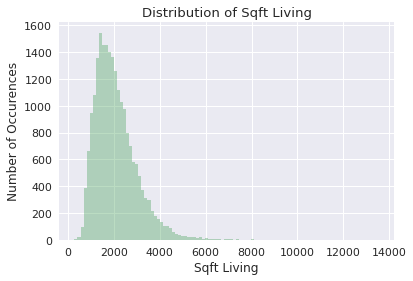

In [0]:
# Assume Normal Distribution And See How It Looks

sns.distplot(df_v2.sqft_living, bins=100, color="g", kde=False)
plt.title("Distribution of Sqft Living")
plt.ylabel("Number of Occurences")
plt.xlabel("Sqft Living")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Sqft Living')

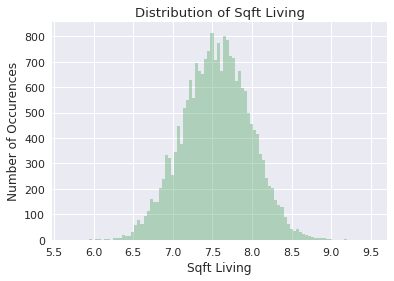

In [0]:
# Assume Exponential Distribution And See How It Looks

sns.distplot(np.log(df_v2.sqft_living), bins=100, color="g", kde=False)
plt.title("Distribution of Sqft Living")
plt.ylabel("Number of Occurences")
plt.xlabel("Sqft Living")

## The sqft_living is distributed exponentially... to make it appear normal we apply a logarithm to all the values before we normalize

In [0]:
log_sqft_living = np.log(df_v2.sqft_living)

print("Original Description of Sqft Living")
print(df_v2.sqft_living.describe())

print()

# Note that after the transform STD-DEV is wayyy down this is good
print("After Logarithmic Transformation Description of Sqft Living")
print(log_sqft_living.describe())

Original Description of Sqft Living
count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

After Logarithmic Transformation Description of Sqft Living
count    21613.000000
mean         7.550335
std          0.424807
min          5.669881
25%          7.263330
50%          7.554859
75%          7.843849
max          9.513404
Name: sqft_living, dtype: float64


In [0]:
normalized_sqft_living = pd.Series(min_max_norm(log_sqft_living))

print("Let's see our normalized standardized data!!\n")
print(normalized_sqft_living.describe())

Let's see our normalized standardized data!!

count    21613.000000
mean         0.489253
std          0.110525
min          0.000000
25%          0.414580
50%          0.490430
75%          0.565619
max          1.000000
dtype: float64


In [0]:
df_v2["sqft_living"] = normalized_sqft_living

print(df_v2.sqft_living.head(5))

0    0.365131
1    0.567651
2    0.254066
3    0.497153
4    0.457046
Name: sqft_living, dtype: float64


## Now that we know what we're doing let's do that for the rest of them

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Sqft Above')

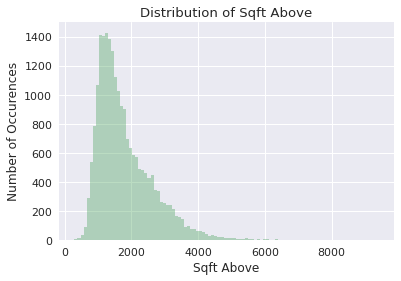

In [0]:
# Assume Normal Distribution And See How It Looks

sns.distplot(df_v2.sqft_above, bins=100, color="g", kde=False)
plt.title("Distribution of Sqft Above")
plt.ylabel("Number of Occurences")
plt.xlabel("Sqft Above")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Sqft Basement')

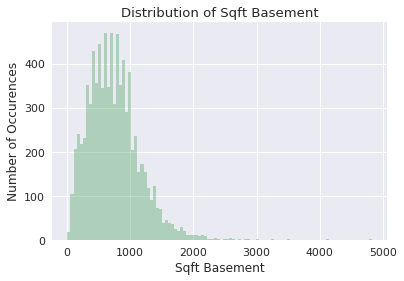

In [0]:
# Assume Normal Distribution And See How It Looks (Ignore 0 Values For Now)

sns.distplot(df_v2.sqft_basement[df_v2.sqft_basement>0], bins=100, color="g", kde=False)
plt.title("Distribution of Sqft Basement")
plt.ylabel("Number of Occurences")
plt.xlabel("Sqft Basement")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Sqft Living 15')

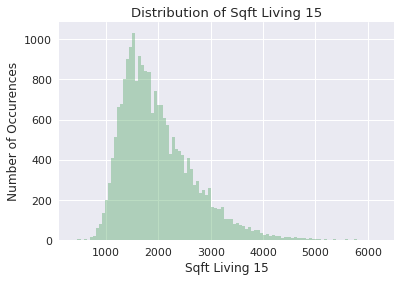

In [0]:
# Assume Normal Distribution And See How It Looks

sns.distplot(df_v2.sqft_living15, bins=100, color="g", kde=False)
plt.title("Distribution of Sqft Living 15")
plt.ylabel("Number of Occurences")
plt.xlabel("Sqft Living 15")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Sqft Above')

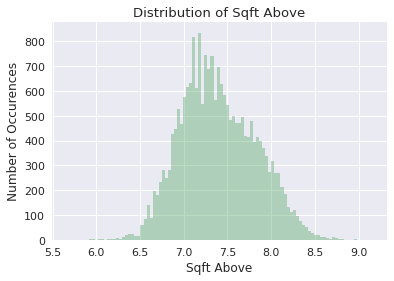

In [0]:
# Logarithmic Distribution Fits Better

sns.distplot(np.log(df_v2.sqft_above), bins=100, color="g", kde=False)
plt.title("Distribution of Sqft Above")
plt.ylabel("Number of Occurences")
plt.xlabel("Sqft Above")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Sqft Basement')

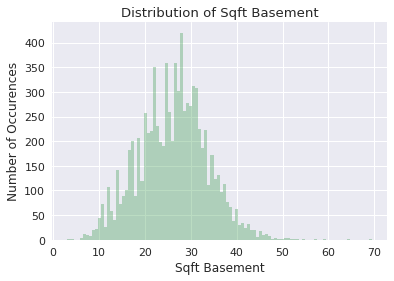

In [0]:
# Square-Root Distribution Fits Better

sns.distplot(np.sqrt(df_v2.sqft_basement[df_v2.sqft_basement>0]), bins=100, color="g", kde=False)
plt.title("Distribution of Sqft Basement")
plt.ylabel("Number of Occurences")
plt.xlabel("Sqft Basement")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Sqft Living 15')

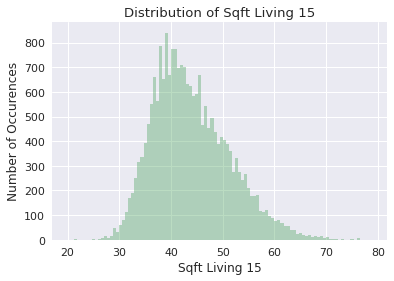

In [0]:
# SQRT Distribution Fit's Better And See How It Looks

sns.distplot(np.sqrt(df_v2.sqft_living15), bins=100, color="g", kde=False)
plt.title("Distribution of Sqft Living 15")
plt.ylabel("Number of Occurences")
plt.xlabel("Sqft Living 15")

### Note we need to take the logarithmic distribution of SQFT_ABOVE and square_root distribution of  SQFT_BASEMENT and SQFT_LIVING15... We need to make sure we have no 0s in the data as log and sqrt can't handle 0s

In [0]:
print("Minimum value of sqft_above : {}\n".format(min(df_v2.sqft_above)))
print("Minimum value of sqft_basement : {}\n".format(min(df_v2.sqft_basement)))
print("Minimum value of sqft_living15 : {}\n".format(min(df_v2.sqft_living15)))

Minimum value of sqft_above : 290

Minimum value of sqft_basement : 0

Minimum value of sqft_living15 : 399



**Therefore we need to add a very small number to all of the numbers in sqft basement (epsilon) before we take the sqrt**

In [0]:
epsilon = 0.001  # 1/100th of a foot will be added
df_v2.sqft_basement = (df_v2.sqft_basement + epsilon)

print("New minimum for SQFT_BASEMENT is {}".format(min(df_v2.sqft_basement)))

New minimum for SQFT_BASEMENT is 0.001


Now we can normalize the logarithmic and square root arrays and replace the original columns with the appropriate normalized/standardized columns

In [0]:
log_sqft_above = np.log(df_v2.sqft_above)
sqrt_sqft_basement = np.sqrt(df_v2.sqft_basement)
sqrt_sqft_living15 = np.sqrt(df_v2.sqft_living15)

norm_sqft_above = pd.Series(min_max_norm(log_sqft_above))
norm_sqft_basement = pd.Series(min_max_norm(sqrt_sqft_basement))
norm_sqft_living15 = pd.Series(min_max_norm(sqrt_sqft_living15))

print("Description of normalized sqft_above")
print(norm_sqft_above.describe())
print()
print("Description of normalized sqft_basement")
print(norm_sqft_basement.describe())
print()
print("Description of normalized sqft_living15")
print(norm_sqft_living15.describe())

Description of normalized sqft_above
count    21613.000000
mean         0.495739
std          0.122895
min          0.000000
25%          0.405739
50%          0.483543
75%          0.583642
max          1.000000
dtype: float64

Description of normalized sqft_basement
count    21613.000000
mean         0.148077
std          0.196148
min          0.000000
25%          0.000000
50%          0.000000
75%          0.340556
max          1.000000
dtype: float64

Description of normalized sqft_living15
count    21613.000000
mean         0.407704
std          0.125035
min          0.000000
25%          0.316607
50%          0.389611
75%          0.486241
max          1.000000
dtype: float64


In [0]:
df_v2.sqft_above = norm_sqft_above
df_v2.sqft_basement = norm_sqft_basement
df_v2.sqft_living15 = norm_sqft_living15

print(df_v2.sqft_above.head(5))
print(df_v2.sqft_basement.head(5))
print(df_v2.sqft_living15.head(5))

0    0.403314
1    0.578392
2    0.280635
3    0.369769
4    0.504841
Name: sqft_above, dtype: float64
0    0.000000
1    0.287752
2    0.000000
3    0.434250
4    0.000000
Name: sqft_basement, dtype: float64
0    0.282703
1    0.359258
2    0.546990
3    0.287330
4    0.381641
Name: sqft_living15, dtype: float64


# Let's Check Where We're At
~~DATE -- We can split into 2014 and 2015~~

~~PRICE -- Normalize by dividing 50000~~

~~BEDROOMS -- Categorize~~

~~BATHROOMS -- Categorize~~

~~SQFT_LIVING -- Min/Max Normalization~~

~~FLOORS -- Categorize~~

~~WATERFRONT -- Leave Alone (Already Binary)~~

~~VIEW -- Leave Alone (Already Binary)~~

~~SQFT_ABOVE -- Min/Max Normalization~~

~~SQFT_BASEMENT -- Min/Max Normalization~~

~~SQFT_LIVING15 -- Min/Max Normalization~~

LATITUDE -- Categorize (Or Try)

**All that's left is latitude ... let's take a look**

In [0]:
print(df_v2.lat.describe())
print("\nThere are {} unique latitude values".format(len(np.unique(df_v2.lat))))

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

There are 5034 unique latitude values


Text(0.5,0,'Latitude Coordinate')

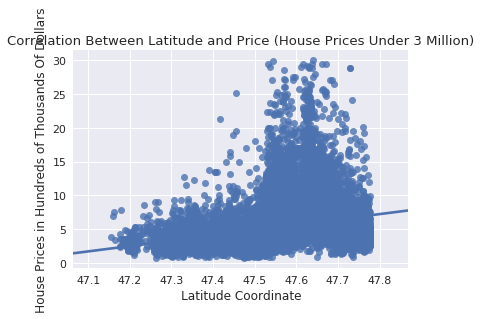

In [0]:
sns.regplot(x=df_v2.lat[df_v2.price<30], y=df_v2.price[df_v2.price<30])
plt.title("Correlation Between Latitude and Price (House Prices Under 3 Million)")
plt.ylabel("House Prices in Hundreds of Thousands Of Dollars")
plt.xlabel("Latitude Coordinate")

## There appears to be a slight correlation... so let's see if we can normalize

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Latitude')

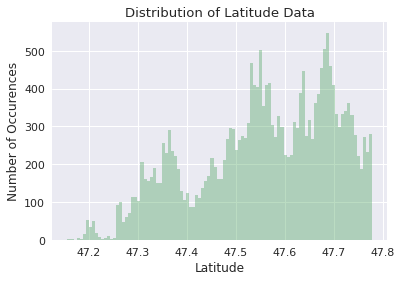

In [0]:
# Check Normal Distribution Fit For Data

sns.distplot((df_v2.lat), bins=100, color="g", kde=False)
plt.title("Distribution of Latitude Data")
plt.ylabel("Number of Occurences")
plt.xlabel("Latitude")

## It would appear that normalization won't work because our data isn't normal... instead we will bucket the latitude data into categories at the first decimal point (47.2, 47.3, etc.)

In [0]:
rounded_latitude = round(df_v2.lat,1)
print(np.unique(rounded_latitude))
print("\nThere are {} unique latitude categories".format(len(np.unique(rounded_latitude))))

[47.2 47.3 47.4 47.5 47.6 47.7 47.8]

There are 7 unique latitude categories


In [0]:
print("ORIGINAL 5 EXAMPLES OF LATITUDES:\n{}".format(rounded_latitude[0:5]))

# INTEGER ENCODING
integer_encoded_latitudes = label_encoder.fit_transform(rounded_latitude)

# Print Check for Integer Encoding
print("\nINTEGER ENCODED 5 EXAMPLES OF LATITUDES:\n{}".format(integer_encoded_latitudes[0:5]))

# ONE_HOT ENCODING
one_hot_encoded_latitudes = to_categorical(integer_encoded_latitudes)

# Print Check for Integer Encoding
print("\nONE_HOT ENCODED 5 EXAMPLES OF LATITUDES:\n{}".format(one_hot_encoded_latitudes[0:5]))

print("\nWe now have {} columns for the {} examples derived from latitude categories".format(np.shape(one_hot_encoded_latitudes)[1], np.shape(one_hot_encoded_latitudes)[0]))


ORIGINAL 5 EXAMPLES OF LATITUDES:
0    47.5
1    47.7
2    47.7
3    47.5
4    47.6
Name: lat, dtype: float64

INTEGER ENCODED 5 EXAMPLES OF LATITUDES:
[3 5 5 3 4]

ONE_HOT ENCODED 5 EXAMPLES OF LATITUDES:
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]

We now have 7 columns for the 21613 examples derived from latitude categories


In [0]:
# Generate New Column Titles
latitude_columns = []
for unique_latitude in np.unique(rounded_latitude):
    latitude_columns.append(str(unique_latitude)+"_Latitude")
    
print(latitude_columns)

['47.2_Latitude', '47.3_Latitude', '47.4_Latitude', '47.5_Latitude', '47.6_Latitude', '47.7_Latitude', '47.8_Latitude']


In [0]:
# We now do what we did before ... generate new columns for all of the latitudes

for i, column in enumerate(latitude_columns):
    df_v2[column] = one_hot_encoded_latitudes[:,i]
    
print(df_v2.head(5))
print()
print(df_v2.columns)

   price  sqft_living  waterfront  view  grade  sqft_above  sqft_basement  \
0  2.219     0.365131           0     0      7    0.403314       0.000000   
1  5.380     0.567651           0     0      7    0.578392       0.287752   
2  1.800     0.254066           0     0      6    0.280635       0.000000   
3  6.040     0.497153           0     0      7    0.369769       0.434250   
4  5.100     0.457046           0     0      8    0.504841       0.000000   

       lat  sqft_living15  Date_2014      ...        2.5_Floors  3.0_Floors  \
0  47.5112       0.282703        1.0      ...               0.0         0.0   
1  47.7210       0.359258        1.0      ...               0.0         0.0   
2  47.7379       0.546990        0.0      ...               0.0         0.0   
3  47.5208       0.287330        1.0      ...               0.0         0.0   
4  47.6168       0.381641        0.0      ...               0.0         0.0   

   3.5_Floors  47.2_Latitude  47.3_Latitude  47.4_Latitude  47

In [0]:
# Now we get rid of the original floors columns
df_v2 = df_v2.drop("lat", axis=1)

print(df_v2.columns)

Index(['price', 'sqft_living', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'Date_2014', 'Date_2015', '0_Bedroom',
       '1_Bedroom', '2_Bedroom', '3_Bedroom', '4_Bedroom', '5_Bedroom',
       '6_Bedroom', '7_Bedroom', '8_Bedroom', '9_Bedroom', '10_Bedroom',
       '11_Bedroom', '33_Bedroom', '0.0_Bathroom', '0.5_Bathroom',
       '0.75_Bathroom', '1.0_Bathroom', '1.25_Bathroom', '1.5_Bathroom',
       '1.75_Bathroom', '2.0_Bathroom', '2.25_Bathroom', '2.5_Bathroom',
       '2.75_Bathroom', '3.0_Bathroom', '3.25_Bathroom', '3.5_Bathroom',
       '3.75_Bathroom', '4.0_Bathroom', '4.25_Bathroom', '4.5_Bathroom',
       '4.75_Bathroom', '5.0_Bathroom', '5.25_Bathroom', '5.5_Bathroom',
       '5.75_Bathroom', '6.0_Bathroom', '6.25_Bathroom', '6.5_Bathroom',
       '6.75_Bathroom', '7.5_Bathroom', '7.75_Bathroom', '8.0_Bathroom',
       '1.0_Floors', '1.5_Floors', '2.0_Floors', '2.5_Floors', '3.0_Floors',
       '3.5_Floors', '47.2_Latitude', '47.3_

## Since grade is distributed between 0 and 10 we just divide all the grades by 10 to normalize them

In [0]:
df_v2.grade = df_v2.grade/10
print(df_v2.grade.head(5))

0    0.7
1    0.7
2    0.6
3    0.7
4    0.8
Name: grade, dtype: float64


In [0]:
# Save a final copy of the dataframe as df_final
df_final = df_v2.copy()
df_v3 = df_v2.copy()

## To Make Our Model Fit Better We Should Get Rid Of The Top 5% As They Are Extreme Outliers (Tried Making Price Logarithmic First)

In [0]:
df_v3 = df_v3[df_v3.price < df_v3.price.quantile(0.93)]

In [0]:
pca = PCA(n_components=2)

In [0]:
principalComponents = pca.fit_transform(df_v3.values[:, 1:])

In [0]:
sns.lmplot(x=principalComponents[:,0], y=principalComponents[:,1], data=df_v3, hue=df_v3.price>5)
plt.title("Correlation Between Principle Component and Price")
plt.ylabel("House Prices in Hundreds of Thousands Of Dollars")
plt.xlabel("Principle Component")

KeyError: '[-1.11206793 -1.10856641 -1.10832203 ...  1.50360772  1.50405155\n  1.51721885] not in index'

## Onto the MODEL!

In [0]:
df_baseline = df_v1.drop('date', axis=1)

In [0]:
print(df_baseline.columns)
Y_baseline = df_baseline.values[:,0]
X_baseline = df_baseline.values[:,1:]

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')


In [0]:
print(df_v3.columns)

Y_intermediate2 = df_v3.values[:,0]
X_intermediate2 = df_v3.values[:,1:]

Index(['price', 'sqft_living', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'Date_2014', 'Date_2015', '0_Bedroom',
       '1_Bedroom', '2_Bedroom', '3_Bedroom', '4_Bedroom', '5_Bedroom',
       '6_Bedroom', '7_Bedroom', '8_Bedroom', '9_Bedroom', '10_Bedroom',
       '11_Bedroom', '33_Bedroom', '0.0_Bathroom', '0.5_Bathroom',
       '0.75_Bathroom', '1.0_Bathroom', '1.25_Bathroom', '1.5_Bathroom',
       '1.75_Bathroom', '2.0_Bathroom', '2.25_Bathroom', '2.5_Bathroom',
       '2.75_Bathroom', '3.0_Bathroom', '3.25_Bathroom', '3.5_Bathroom',
       '3.75_Bathroom', '4.0_Bathroom', '4.25_Bathroom', '4.5_Bathroom',
       '4.75_Bathroom', '5.0_Bathroom', '5.25_Bathroom', '5.5_Bathroom',
       '5.75_Bathroom', '6.0_Bathroom', '6.25_Bathroom', '6.5_Bathroom',
       '6.75_Bathroom', '7.5_Bathroom', '7.75_Bathroom', '8.0_Bathroom',
       '1.0_Floors', '1.5_Floors', '2.0_Floors', '2.5_Floors', '3.0_Floors',
       '3.5_Floors', '47.2_Latitude', '47.3_

In [0]:
print(df_final.columns)

Y = df_final.values[:,0]
X = df_final.values[:,1:]

Index(['price', 'sqft_living', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'Date_2014', 'Date_2015', '0_Bedroom',
       '1_Bedroom', '2_Bedroom', '3_Bedroom', '4_Bedroom', '5_Bedroom',
       '6_Bedroom', '7_Bedroom', '8_Bedroom', '9_Bedroom', '10_Bedroom',
       '11_Bedroom', '33_Bedroom', '0.0_Bathroom', '0.5_Bathroom',
       '0.75_Bathroom', '1.0_Bathroom', '1.25_Bathroom', '1.5_Bathroom',
       '1.75_Bathroom', '2.0_Bathroom', '2.25_Bathroom', '2.5_Bathroom',
       '2.75_Bathroom', '3.0_Bathroom', '3.25_Bathroom', '3.5_Bathroom',
       '3.75_Bathroom', '4.0_Bathroom', '4.25_Bathroom', '4.5_Bathroom',
       '4.75_Bathroom', '5.0_Bathroom', '5.25_Bathroom', '5.5_Bathroom',
       '5.75_Bathroom', '6.0_Bathroom', '6.25_Bathroom', '6.5_Bathroom',
       '6.75_Bathroom', '7.5_Bathroom', '7.75_Bathroom', '8.0_Bathroom',
       '1.0_Floors', '1.5_Floors', '2.0_Floors', '2.5_Floors', '3.0_Floors',
       '3.5_Floors', '47.2_Latitude', '47.3_

In [0]:
X_train_baseline, X_test_baseline, Y_train_baseline, Y_test_baseline = train_test_split(X_baseline, Y_baseline, test_size=0.1)
X_train_intermediate2, X_test_intermediate2, Y_train_intermediate2, Y_test_intermediate2 = train_test_split(X_intermediate2, Y_intermediate2, test_size=0.1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [0]:
# define base model
def baselineModel():
    # create model
    model = Sequential()
    
    model.add(Dense(128, input_dim=11, activation='relu'))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    
    model.add(Dense(1))
    
    adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
    return model

# define intermediate model
def intermediateModel():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=65, activation='relu'))
    model.add(Dropout(0.02))

    model.add(Dense(192, activation='relu'))
    model.add(Dropout(0.02))
    model.add(Dense(192, activation='relu'))
    model.add(Dropout(0.02))
    model.add(Dense(192, activation='relu'))
    model.add(Dropout(0.02))
    
    model.add(Dense(128, activation='relu'))
    
    model.add(Dense(1))
    
    adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
    return model

In [0]:
baseline_model = baselineModel()

In [0]:
history_baseline = baseline_model.fit(X_train_baseline, Y_train_baseline, batch_size=10, epochs=20, validation_data=(X_test_baseline, Y_test_baseline))

Train on 19451 samples, validate on 2162 samples
Epoch 1/20
19451/19451 [==============================] - 7s 352us/step - loss: 142099378766.5728 - mean_absolute_error: 248754.8812 - val_loss: 69927940587.6337 - val_mean_absolute_error: 164363.9490
Epoch 2/20
19451/19451 [==============================] - 6s 284us/step - loss: 70537690722.1305 - mean_absolute_error: 171607.4375 - val_loss: 69015817041.7021 - val_mean_absolute_error: 163865.4391
Epoch 3/20
19451/19451 [==============================] - 6s 284us/step - loss: 69762952985.9146 - mean_absolute_error: 171029.8294 - val_loss: 68460206485.4320 - val_mean_absolute_error: 163448.8447
Epoch 4/20
19451/19451 [==============================] - 6s 284us/step - loss: 69218524751.0993 - mean_absolute_error: 170322.4482 - val_loss: 67912531196.4477 - val_mean_absolute_error: 166545.9751
Epoch 5/20
19451/19451 [==============================] - 6s 286us/step - loss: 68933413010.9588 - mean_absolute_error: 170122.9126 - val_loss: 676528

In [0]:
intermediate_model = intermediateModel()

In [0]:
history_intermediate = intermediate_model.fit(X_train, Y_train, batch_size=100, epochs=100, validation_data=(X_test, Y_test))

Train on 19451 samples, validate on 2162 samples
Epoch 1/100
19451/19451 [==============================] - 1s 67us/step - loss: 16.1883 - mean_absolute_error: 2.6302 - val_loss: 7.2222 - val_mean_absolute_error: 1.5179
Epoch 2/100
19451/19451 [==============================] - 1s 41us/step - loss: 5.7539 - mean_absolute_error: 1.3627 - val_loss: 5.7003 - val_mean_absolute_error: 1.2967
Epoch 3/100
19451/19451 [==============================] - 1s 41us/step - loss: 4.7376 - mean_absolute_error: 1.2222 - val_loss: 4.7085 - val_mean_absolute_error: 1.1623
Epoch 4/100
19451/19451 [==============================] - 1s 41us/step - loss: 4.0779 - mean_absolute_error: 1.1536 - val_loss: 4.0935 - val_mean_absolute_error: 1.1037
Epoch 5/100
19451/19451 [==============================] - 1s 40us/step - loss: 3.7468 - mean_absolute_error: 1.1146 - val_loss: 3.7772 - val_mean_absolute_error: 1.0862
Epoch 6/100
19451/19451 [==============================] - 1s 40us/step - loss: 3.4663 - mean_absolu

In [0]:
intermediate2_model = intermediateModel()

In [0]:
history_intermediate2 = intermediate2_model.fit(X_train_intermediate2, Y_train_intermediate2, batch_size=100, epochs=100, validation_data=(X_test_intermediate2, Y_test_intermediate2))

Train on 18089 samples, validate on 2010 samples
Epoch 1/100
18089/18089 [==============================] - 1s 73us/step - loss: 6.7245 - mean_absolute_error: 1.9315 - val_loss: 1.7048 - val_mean_absolute_error: 1.0019
Epoch 2/100
18089/18089 [==============================] - 1s 41us/step - loss: 1.5053 - mean_absolute_error: 0.9364 - val_loss: 1.3180 - val_mean_absolute_error: 0.8561
Epoch 3/100
18089/18089 [==============================] - 1s 41us/step - loss: 1.2780 - mean_absolute_error: 0.8450 - val_loss: 1.2028 - val_mean_absolute_error: 0.7935
Epoch 4/100
18089/18089 [==============================] - 1s 41us/step - loss: 1.1732 - mean_absolute_error: 0.8044 - val_loss: 1.1093 - val_mean_absolute_error: 0.7737
Epoch 5/100
18089/18089 [==============================] - 1s 41us/step - loss: 1.1175 - mean_absolute_error: 0.7835 - val_loss: 1.0738 - val_mean_absolute_error: 0.7510
Epoch 6/100
18089/18089 [==============================] - 1s 41us/step - loss: 1.0766 - mean_absolut

In [0]:
print(history_baseline.history.keys())
# summarize history for accuracy
plt.plot(history_baseline.history['mean_absolute_error'])
plt.plot(history_baseline.history['val_mean_absolute_error'])
plt.title('Baseline Model MAE')
plt.ylabel('Mean Absolute Error (1$)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history_baseline' is not defined

In [0]:
# summarize history for loss
plt.plot(history_baseline.history['loss'])
plt.plot(history_baseline.history['val_loss'])
plt.title('Baseline Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
print(history_intermediate.history.keys())
# summarize history for accuracy
plt.plot(history_intermediate.history['mean_absolute_error'])
plt.plot(history_intermediate.history['val_mean_absolute_error'])
plt.title('Intermediate Model MAE')
plt.ylabel('Mean Absolute Error (100,000$)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# summarize history for loss
plt.plot(history_intermediate.history['loss'])
plt.plot(history_intermediate.history['val_loss'])
plt.title('Intermediate Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
print(history_intermediate.history.keys())
# summarize history for accuracy
plt.plot(history_intermediate2.history['mean_absolute_error'])
plt.plot(history_intermediate2.history['val_mean_absolute_error'])
plt.title('Intermediate Model MAE')
plt.ylabel('Mean Absolute Error (100,000$)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# summarize history for loss
plt.plot(history_intermediate2.history['loss'])
plt.plot(history_intermediate2.history['val_loss'])
plt.title('Intermediate Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
lb = np.random.randint((df_v3.shape[0]-1000), size=1)[0]
ub = int(lb+1000)
for i in range(lb,ub,10):
    predict = np.reshape(df_v3.values[i][1:],[1,65])
    print("\n\n\nHouse {}\n--------------------------------------------------".format(i))
    print(df_v3.iloc[i].iloc[df_v3.iloc[i].nonzero()[0]])
    
    print("\nModel Guess is {} Dollars".format(round(100000 * intermediate2_model.predict(predict, batch_size=None)[0][0])))
    print("Actual Value is {} Dollars\n----------------------------------------------------".format(round(100000 * df_v3.values[i][0])))